## Import & Paths

In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt

#Paths
processed_path = r"C:\UNI\Code\F1_Race_Predictor\data\processed"
models_path = r"C:\UNI\Code\F1_Race_Predictor\models"

season = 2023
gp = "Bahrain"

## Load Data

In [9]:
#Load processed data
q_results = pd.read_csv(fr"{processed_path}\{season}_{gp}_qualifying_clean.csv")
r_results = pd.read_csv(fr"{processed_path}\{season}_{gp}_race_clean.csv")

#Merge qualifying and race results on Abbreviation (driver code)
df = pd.merge(
    q_results[['Abbreviation', 'Q1', 'Q2', 'Q3']],
    r_results[['Abbreviation', 'Gridposition', 'Position']],
    on='Abbreviation'
)

print("Training Dataset:")
display(df.head())
display(df.tail())

Training Dataset:


,Abbreviation,Q1,Q2,Q3,Gridposition,Position
0,VER,0 days 00:01:31.295000,0 days 00:01:30.503000,0 days 00:01:29.708000,1.0,1.0
1,PER,0 days 00:01:31.479000,0 days 00:01:30.746000,0 days 00:01:29.846000,2.0,2.0
2,LEC,0 days 00:01:31.094000,0 days 00:01:30.282000,0 days 00:01:30,3.0,19.0
3,SAI,0 days 00:01:30.993000,0 days 00:01:30.515000,0 days 00:01:30.154000,4.0,4.0
4,ALO,0 days 00:01:31.158000,0 days 00:01:30.645000,0 days 00:01:30.336000,5.0,3.0


,Abbreviation,Q1,Q2,Q3,Gridposition,Position
15,SAR,0 days 00:01:31.652000,NaN,NaN,16.0,12.0
16,MAG,0 days 00:01:31.892000,NaN,NaN,17.0,13.0
17,PIA,0 days 00:01:32.101000,NaN,NaN,18.0,20.0
18,DEV,0 days 00:01:32.121000,NaN,NaN,19.0,14.0
19,GAS,0 days 00:01:32.181000,NaN,NaN,20.0,9.0


## Feature Engineering

In [17]:
# Convert timedelta to total seconds
for col in ['Q1', 'Q2', 'Q3']:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds()


In [18]:
# Define features (inputs) and target (output)
features = ['Q1', 'Q2', 'Q3', 'Gridposition']
x = df[features].fillna(0) # Fill NaN values with 0 (non-qualifiers)
y = df['Position']

## Train-Test Split

In [19]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## Train Model

In [21]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluation

In [24]:
# Predictions
y_pred = model.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 8.27
R² Score: -0.52


## Feature Importance

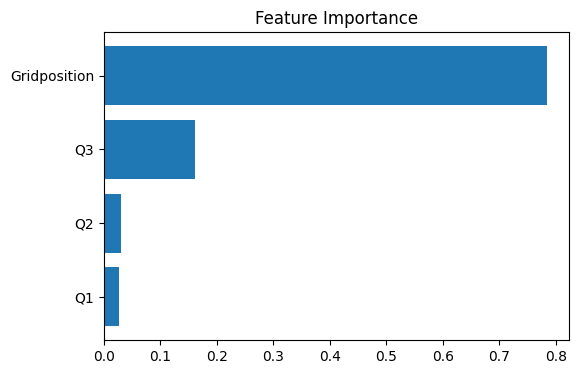

In [25]:
# Feature importance plot
importances = model.feature_importances_
plt.figure(figsize=(6,4))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()


## Save Model

In [27]:
# Save trained model
joblib.dump(model, fr"{models_path}\{season}_{gp}_rf_model.pkl")
print("Model saved successfully!")


Model saved successfully!


## V2 of Model Training

In [ ]:
#Load Data
qual_df = pd.read_csv(fr"{processed_path}\qualifying_2023_cleaned.csv") 
race_df = pd.read_csv(fr"{processed_path}\race_2023_cleaned.csv")

print("Qualifying shape:", qual_df.shape)
print("Race shape:", race_df.shape)

#Quick check of columns
print("\nQualifying columns:", qual_df.columns.tolist())
print("Race columns:", race_df.columns.tolist())

Qualifying shape: (200, 23)
Race shape: (200, 23)

Qualifying columns: ['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName', 'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName', 'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'Laps', 'GrandPrix']
Race columns: ['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName', 'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName', 'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'Laps', 'GrandPrix']


## Merging Datasets

In [3]:
#Merge both datasets
merged = pd.merge(
    qual_df,
    race_df,
    on=['Abbreviation', 'TeamName', 'GrandPrix'],
    suffixes=('_qual', '_race')
)

print("Merged shape:", merged.shape)
display(merged.head())

Merged shape: (200, 43)


,DriverNumber_qual,BroadcastName_qual,Abbreviation,DriverId_qual,TeamName,TeamColor_qual,TeamId_qual,FirstName_qual,LastName_qual,FullName_qual,...,Position_race,ClassifiedPosition_race,GridPosition_race,Q1_race,Q2_race,Q3_race,Time_race,Status_race,Points_race,Laps_race
0,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,1.0,1,1.0,NaN,NaN,NaN,0 days 02:32:38.371000,Finished,25.0,58.0
1,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,18.0,R,2.0,NaN,NaN,NaN,NaN,Retired,0.0,17.0
2,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,2.0,2,3.0,NaN,NaN,NaN,0 days 00:00:00.179000,Finished,18.0,58.0
3,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,3.0,3,4.0,NaN,NaN,NaN,0 days 00:00:00.769000,Finished,15.0,58.0
4,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,12.0,12,5.0,NaN,NaN,NaN,0 days 00:00:06.594000,Finished,0.0,58.0


## Preparation of features

In [4]:
#Feature subset
features = [
    'Position_qual',       #qualifying position 
    'Q1', 'Q2', 'Q3',      #qualifying lap times
    'Gridposition',        #grid position
]

target = 'Position_race'   #race finishing position

#Keep only available columns
features = [f for f in features if f in merged.columns]

#Drop rows with missing target values
merged = merged.dropna(subset=features + [target])

## Encoding categorical variables

In [5]:
# --- Save and apply LabelEncoders ---
encoders = {}
for col in ['TeamName', 'GrandPrix']:
    if col in merged.columns:
        le = LabelEncoder()
        merged[col] = le.fit_transform(merged[col])
        encoders[col] = le
        features.append(col)

# Save encoders
for name, encoder in encoders.items():
    joblib.dump(encoder, fr"{models_path}\label_encoder_{name}.pkl")

## Train-Test Split v2

In [6]:
x = merged[features]
y = merged[target]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## Train Model v2

In [7]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 3.76
R² Score: 0.10


## Compare with simpler model

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression MAE: 4.3629413605407965
Linear Regression R²: -0.03707380112384451


## Visualization

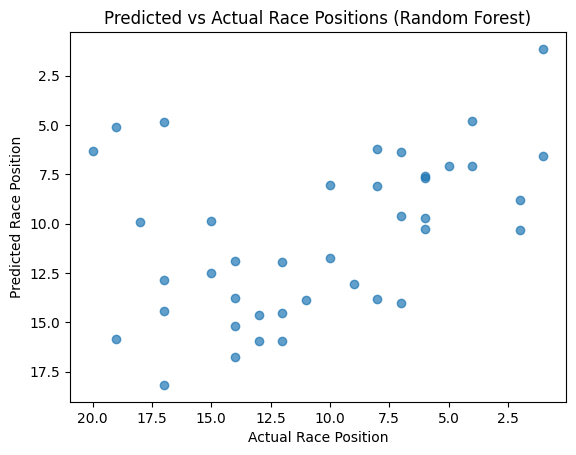

In [13]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Race Position")
plt.ylabel("Predicted Race Position")
plt.title("Predicted vs Actual Race Positions (Random Forest)")
plt.gca().invert_xaxis()  # smaller position = better
plt.gca().invert_yaxis()
plt.show()


## Save Model

In [8]:
# Save trained model
joblib.dump(rf, fr"{models_path}\qualifying_2023_cleaned_rf_model(2).pkl")
print("Model saved successfully!")

Model saved successfully!
